In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import math
from PIL import Image
import scipy
import cmath
from parfor import parfor
from joblib import Parallel, delayed

# Problem 1

### Question 1

In [3]:
def hist_img(image):    #Function to plot histogram of an image
     
    img = plt.imread(image) 
    h = [0] * 256
    a = np.arange(0,256,1)
    for x in range(np.shape(img)[0]):
        for y in range(np.shape(img)[1]):
            i = img[x,y]
            h[i] = h[i] + 1

    return a,h         # returns the array a, i.e. 0-255 values and the respective counts on each of those values i.e. h


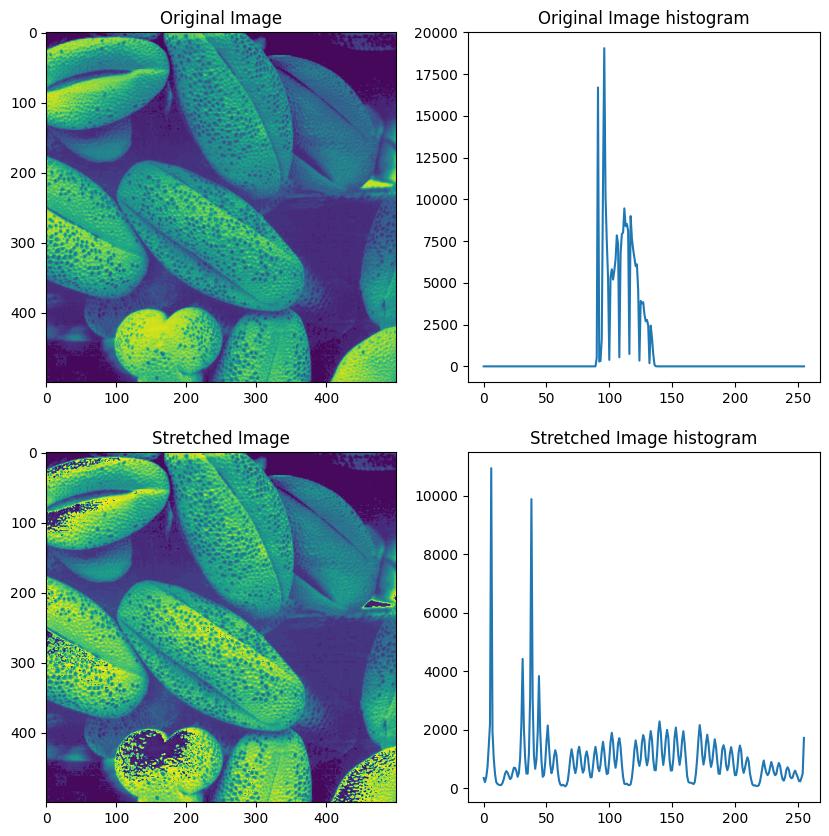

In [4]:
def stretch(image):
    
    img = plt.imread(image)    
    
    figure, axs = plt.subplots(2, 2, figsize=(10, 10))
    
    axs[0, 0].imshow(img)
    axs[0, 0].set_title('Original Image')
    a,h = hist_img(image)
    axs[0, 1].plot(a,h)
    axs[0, 1].set_title('Original Image histogram')

    a_min = min(min(img[1]),min(img[0]))
    a_max = max(max(img[0]),max(img[1]))

    for i in range(len(img[0])):
        for j in range(len(img[1])):
            img[i,j] = ((img[i,j] - a_min)*(255/(a_max - a_min))) #Contrast stretching  
            
    

    axs[1, 0].imshow(img)
    axs[1, 0].set_title('Stretched Image')
    cv2.imwrite("stretched.jpg",img) 
    a_1,h_1 = hist_img("stretched.jpg")
    axs[1, 1].plot(a_1,h_1)
    axs[1, 1].set_title('Stretched Image histogram')
            
stretch("c1.jpg")
#plt.imshow(img)
#cv2.imwrite("stretched.jpg",img)      

### Question 2

Contrast stretching is a technique used to enhance the contrast of an image by increasing the range of pixel values. It can be particularly useful for improving the visibility of details in low light levels. Here are some advantages of using contrast stretching for low light levels:

1.) Increased visibility: Contrast stretching can make low light images appear brighter and more visible by increasing the range of pixel values. This can help to reveal details that may be hidden in shadowy areas.

2.) Improved image quality: Low light images can often appear grainy or pixelated, but contrast stretching can help to smooth out the image and make it appear more natural.

3.) Better color reproduction: In low light conditions, colors can appear dull or washed out. By increasing the contrast, contrast stretching can help to bring out the true colors of the image.

4.) Enhanced edge detection: Contrast stretching can help to enhance the edges of objects in low light images, making them easier to distinguish from their surroundings.

5.) Increased accuracy of analysis: For scientific or medical purposes, low light images may need to be analyzed for details or abnormalities. Contrast stretching can improve the accuracy of these analyses by making the details clearer and easier to discern.

Therefore, contrast stretching can be a powerful tool for enhancing the quality and visibility of low light images.

### Question 3

Text(0.5, 1.0, 'equalized histogram')

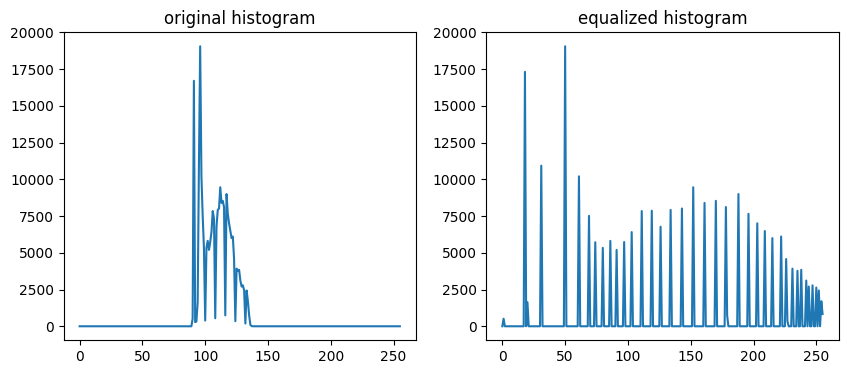

In [48]:
def hist_img(image): #Histogram function
     
    img = plt.imread(image) 
    h = [0] * 256
    a = np.arange(0,256,1)
    for x in range(np.shape(img)[0]):
        for y in range(np.shape(img)[1]):
            i = img[x,y]
            h[i] = h[i] + 1

    return a,h


img = plt.imread("c1.jpg")
h = [0] * 256
a = np.arange(0,256,1)
for x in range(np.shape(img)[0]):
    for y in range(np.shape(img)[1]):
        i = img[x,y]
        h[i] = h[i] + 1
for i in range(len(h)):
    h[i] = h[i]/(np.shape(img)[0]*np.shape(img)[1])    
s = [0] * 256 
for i in range(1,len(h)):
    s[0] = int(h[0])
    s[i] = h[i] + s[i-1]      #creating the CDF

s_min = min(s)
L = 256
g = [0] * 256
for i in range(0,len(h)):
    g[i] = int((((s[i] - s_min)*(L-1))/(1-s_min)) + 0.5)   #creating the round up values
    
m = [0] * 256
for i in range(0,256):
    j = g[i]
    m[j] += h[i]  # main step of equalization
    
for i in range(256):
    m[i] = m[i]*((np.shape(img)[0])*(np.shape(img)[1]))
a,h = hist_img("c1.jpg")

fig, ax = plt.subplots(1,2, figsize = (10,4))

ax[0].plot(a,h)
ax[0].set_title("original histogram")
ax[1].plot(a,m)
ax[1].set_title("equalized histogram")

### Question 4

In [177]:
#Code to convert rgb eye to gray eye image
img_rgb = Image.open('eye.png')
img_gray = img_rgb.convert('L')
img_gray.save('eye_gray.png')

In [7]:
I = plt.imread("eye_gray.png")
im = cv2.normalize(I, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U) #Converting the range [0,1] to [0,255]
np.shape(im) #Checking the shape of the image

(1200, 1200)

Text(0.5, 1.0, 'equalized histogram of eye')

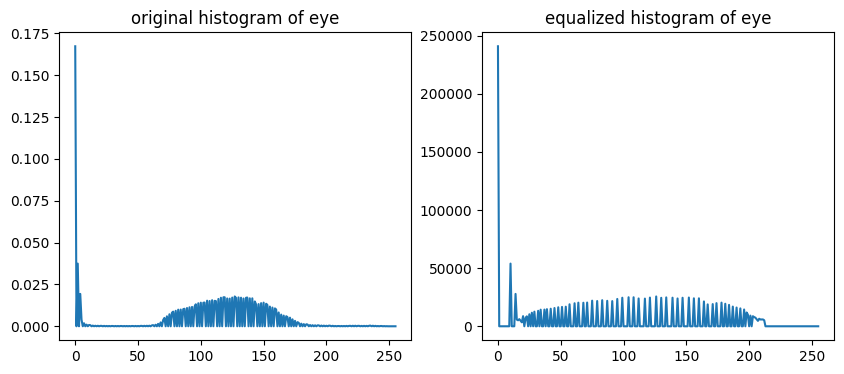

In [49]:
# Here we equalize the hostogram of the first image i.e, eye
h = [0] * 256
a = np.arange(0,256,1)
for x in range(np.shape(im)[0]):
    for y in range(np.shape(im)[1]):
        i = im[x,y]
        h[i] = h[i] + 1
for i in range(len(h)):
    h[i] = h[i]/(np.shape(im)[0]*np.shape(im)[1])    
#plt.plot(a,h)

h = [0] * 256
a = np.arange(0,256,1)
for x in range(np.shape(im)[0]):
    for y in range(np.shape(im)[1]):
        i = im[x,y]
        h[i] = h[i] + 1
for i in range(len(h)):
    h[i] = h[i]/(np.shape(im)[0]*np.shape(im)[1])  
s = [0] * 256 
for i in range(1,len(h)):
    s[0] = int(h[0])
    s[i] = h[i] + s[i-1]      

s_min = min(s)
L = 256
g = [0] * 256
for i in range(0,len(h)):
    g[i] = int((((s[i] - s_min)*(L-1))/(1-s_min)) + 0.5)  
    
m = [0] * 256
for i in range(0,256):
    j = g[i]
    m[j] += h[i]  
    
for i in range(256):
    m[i] = m[i]*((np.shape(im)[0])*(np.shape(im)[1]))

fig, ax = plt.subplots(1,2, figsize = (10,4))

ax[0].plot(a,h)
ax[0].set_title("original histogram of eye")
ax[1].plot(a,m)
ax[1].set_title("equalized histogram of eye")

Text(0.5, 1.0, 'equalized histogram of eye-ref')

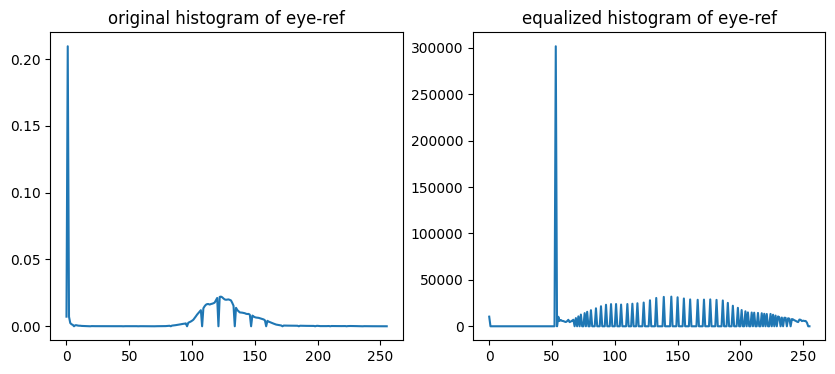

In [50]:
# Here we equalize the reference image eyeref
I_2 = plt.imread("eyeref_gray.png")
im_2 = cv2.normalize(I_2, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
h = [0] * 256
a = np.arange(0,256,1)
for x in range(np.shape(im_2)[0]):
    for y in range(np.shape(im_2)[1]):
        i = im_2[x,y]
        h[i] = h[i] + 1
for i in range(len(h)):
    h[i] = h[i]/(np.shape(im_2)[0]*np.shape(im_2)[1])    

I_2 = plt.imread("eyeref_gray.png")
im_2 = cv2.normalize(I_2, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
h_2 = [0] * 256
a_2 = np.arange(0,256,1)
for x in range(np.shape(im_2)[0]):
    for y in range(np.shape(im_2)[1]):
        i = im_2[x,y]
        h_2[i] = h_2[i] + 1
        
for i in range(len(h_2)):
    h_2[i] = h_2[i]/(np.shape(im_2)[0]*np.shape(im_2)[1])  
s_2 = [0] * 256 

for i in range(1,len(h_2)):
    s_2[0] = int(h_2[0])
    s_2[i] = h_2[i] + s_2[i-1]      

s_min_2 = min(s_2)
L = 256
g_2 = [0] * 256
for i in range(0,len(h_2)):
    g_2[i] = int((((s_2[i] - s_min_2)*(L-1))/(1-s_min_2)) + 0.5)  
    
m_2 = [0] * 256
for i in range(0,256):
    j = g_2[i]
    m_2[j] += h_2[i]  
    
for i in range(256):
    m_2[i] = m_2[i]*((np.shape(im_2)[0])*(np.shape(im_2)[1]))
#plt.plot(a_2,m_2)

fig, ax = plt.subplots(1,2, figsize = (10,4))

ax[0].plot(a,h)
ax[0].set_title("original histogram of eye-ref")
ax[1].plot(a_2,m_2)
ax[1].set_title("equalized histogram of eye-ref")

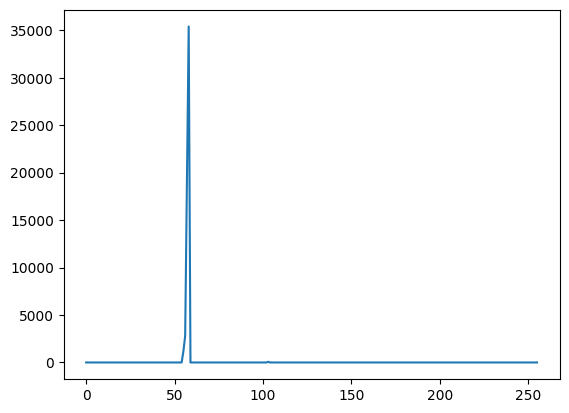

In [45]:
g_3 = [0] * 256
a_3 = np.arange(0,256,1)
for i in range(len(g)):
    if g[i] == g_2[i]:  # g and g_2 are the equalized version of two images that is the original image and the reference image respectively
        g_3[i] = g_2[i] # g_3 is the final histogram that we want 
        
    elif g_2[i] < g[i]: #checking each value of g_2 and assigning it to g_3 
        l = []
        l_positive = []
        l_index = []
        for j in range(len(g)):
            l.append(g_2[i] - g[j]) #checking the difference of the present element with all the elements
        for k in range(len(l)):
            if l[k] >= 0:
                l_positive.append(l[k]) # discarding all the negative values from the differece vector
        min_ele = min(l_positive)       # finding the minimum of that of difference vector
        for m in range(len(l_positive)):
            if l_positive[m] == min_ele:
                l_index.append(m)       #taking all the indices of that minimum values
        for n in range(len(l_index)):   #assigning all the values of those indicices to the new histogram
            z = g_2[n]
            g_3[z] += g[n]    
        
    elif g[i] < g_2[i]: #checking each value of g_2 and assigning it to g_3 
        l = []
        l_positive = []
        l_index = []
        for j in range(len(g)):
            l.append(g_2[i] - g[j]) #checking the difference of the present element with all the elements
        for k in range(len(l)):
            if l[k] >= 0:
                l_positive.append(l[k]) # discarding all the negative values from the differece vector
        min_ele = min(l_positive)       # finding the minimum of that of difference vector
        for m in range(len(l_positive)):
            if l_positive[m] == min_ele:
                l_index.append(m)       #taking all the indices of that minimum values
        for n in range(len(l_index)):   #assigning all the values of those indicices to the new histogram
            z = g_2[n]
            g_3[z] += g[n]   

    elif g_2[i] == 0:
        g_3[i] = 0

plt.plot(a_3, g_3)


# Problem 2

### Question 1

In [70]:
im = plt.imread("cameraman.png")
im_1 = cv2.normalize(im, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
im_r = np.shape(im_1)[0]
im_c = np.shape(im_1)[1]

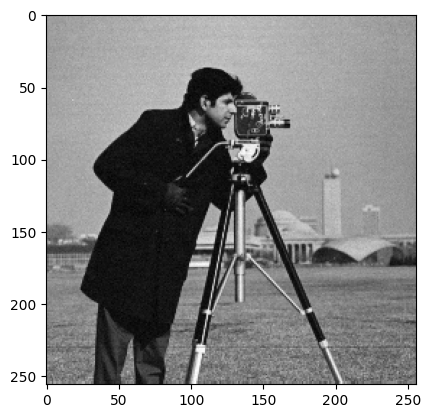

In [71]:
noise = np.random.normal(0, 5, size = im_1.shape) #adding random gaussian noise of std deviation 5 and mean 0
I_noisy = im_1 + noise
plt.imshow(I_noisy, cmap = 'gray') 

Text(0.5, 1.0, '15x15 filter used')

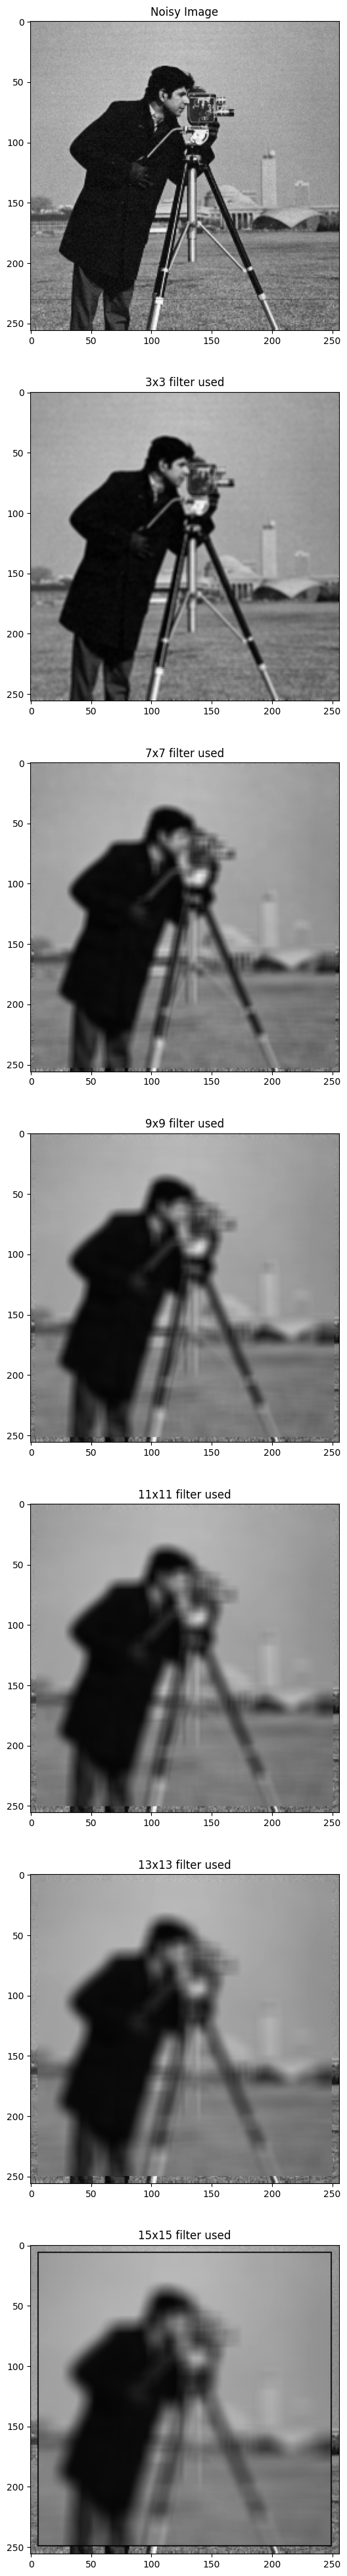

In [76]:
#In this program deliberately the loop is not used to see how the code is actually running as compared to the following two questions

figure, axs = plt.subplots(7, 1, figsize=(10, 50))

axs[0].imshow(I_noisy, cmap = 'gray') # Original noisy image
axs[0].set_title('Noisy Image')

#--- correcting the edge of the resulting image-----
out_img_1 = np.zeros((int(np.shape(im_1)[0]),int(np.shape(im_1)[1]))).astype(int)
for i in range(im_r):
    out_img_1[0,i] = I_noisy[0,i]
    out_img_1[i,0] = I_noisy[i,0]
    out_img_1[255,i] = I_noisy[255,i]
    out_img_1[i,255] = I_noisy[i,255]
    
for i in range(1,im_r-1):
    for k in range(1,im_c-1):
        c = 0
        for j in range(0,3):    # 3x3 filter kernel
            for l in range(0,3):
                c += (I_noisy[i+(1-j),k+(1-l)]) #here the '1' signifies the middle value of the kernel that is to obtain (traverse) the stretches of the filter symmetrically
                out_img_1[i,k] = 1/9 *c         

axs[1].imshow(out_img_1, cmap = 'gray')
axs[1].set_title('3x3 filter used')     #           

out_img_2 = np.zeros((int(np.shape(im_1)[0]),int(np.shape(im_1)[1]))).astype(int)
#--- correcting the edge of the resulting image-----
for i in range(im_r):
    for j in range(0,2):
        out_img_2[j,i] = I_noisy[j,i]
        out_img_2[i,j] = I_noisy[i,j]
        out_img_2[255-j,i] = I_noisy[255-j,i]
        out_img_2[i,255-j] = I_noisy[i,255-j]
    
    
for i in range(2,im_r-2):
    for k in range(2,im_c-2):
        c = 0
        for j in range(0,5):  # 5x5 filter kernel
            for l in range(0,5):
                c += (I_noisy[i+(2-j),k+(2-l)]) #here the '2' signifies the middle value of the kernel that is to obtain (traverse) the stretches of the filter symmetrically
                out_img_2[i,k] = 1/25 *c
                
axs[2].imshow(out_img_2, cmap = 'gray')
axs[2].set_title('5x5 filter used')                 

out_img_3 = np.zeros((int(np.shape(im_1)[0]),int(np.shape(im_1)[1]))).astype(int)
#--- correcting the edge of the resulting image-----
for i in range(im_r):
    for j in range(0,3):
        out_img_3[j,i] = I_noisy[j,i]
        out_img_3[i,j] = I_noisy[i,j]
        out_img_3[255-j,i] = I_noisy[255-j,i]
        out_img_3[i,255-j] = I_noisy[i,255-j]
    
    
for i in range(3,im_r-3):
    for k in range(3,im_c-3):
        c = 0
        for j in range(0,7):  # 7x7 filter kernel
            for l in range(0,7):
                c += (I_noisy[i+(3-j),k+(3-l)]) #here the '3' signifies the middle value of the kernel that is to obtain (traverse) the stretches of the filter symmetrically
                out_img_3[i,k] = 1/49 *c
                
axs[2].imshow(out_img_3, cmap = 'gray')
axs[2].set_title('7x7 filter used') 

out_img_4 = np.zeros((int(np.shape(im_1)[0]),int(np.shape(im_1)[1]))).astype(int)
#--- correcting the edge of the resulting image-----
for i in range(im_r):
    for j in range(0,4):
        out_img_4[j,i] = I_noisy[j,i]
        out_img_4[i,j] = I_noisy[i,j]
        out_img_4[255-j,i] = I_noisy[255-j,i]
        out_img_4[i,255-j] = I_noisy[i,255-j]
    
for i in range(4,im_r-4):
    for k in range(4,im_c-4):
        c = 0
        for j in range(0,9):    # 9x9 filter kernel
            for l in range(0,9):
                c += (I_noisy[i+(4-j),k+(4-l)]) #here the '4' signifies the middle value of the kernel that is to obtain (traverse) the stretches of the filter symmetrically
                out_img_4[i,k] = 1/81 * c
                
                
axs[3].imshow(out_img_4,cmap = 'gray')
axs[3].set_title('9x9 filter used') 
                
out_img_5 = np.zeros((int(np.shape(im_1)[0]),int(np.shape(im_1)[1]))).astype(int)
#--- correcting the edge of the resulting image-----
for i in range(im_r):
    for j in range(0,5):
        out_img_5[j,i] = I_noisy[j,i]
        out_img_5[i,j] = I_noisy[i,j]
        out_img_5[255-j,i] = I_noisy[255-j,i]
        out_img_5[i,255-j] = I_noisy[i,255-j]
    
for i in range(5,im_r-5):
    for k in range(5,im_c-5):
        c = 0
        for j in range(0,11):  # 11x11 filter kernel
            for l in range(0,11):
                c += (I_noisy[i+(5-j),k+(5-l)]) #here the '5' signifies the middle value of the kernel that is to obtain (traverse) the stretches of the filter symmetrically
                out_img_5[i,k] = 1/121 * c
                
                
axs[4].imshow(out_img_5, cmap = 'gray')
axs[4].set_title('11x11 filter used') 


out_img_6 = np.zeros((int(np.shape(im_1)[0]),int(np.shape(im_1)[1]))).astype(int)
#--- correcting the edge of the resulting image-----
for i in range(im_r):
    for j in range(0,6):
        out_img_6[j,i] = I_noisy[j,i]
        out_img_6[i,j] = I_noisy[i,j]
        out_img_6[255-j,i] = I_noisy[255-j,i]
        out_img_6[i,255-j] = I_noisy[i,255-j]
    
for i in range(6,im_r-6):
    for k in range(6,im_c-6):
        c = 0
        for j in range(0,13):  # 13x13 filter kernel
            for l in range(0,13):
                c += (I_noisy[i+(6-j),k+(6-l)]) #here the '6' signifies the middle value of the kernel that is to obtain (traverse) the stretches of the filter symmetrically
                out_img_6[i,k] = 1/169 * c 
                
axs[5].imshow(out_img_6, cmap = 'gray')
axs[5].set_title('13x13 filter used') 
                
out_img_7 = np.zeros((int(np.shape(im_1)[0]),int(np.shape(im_1)[1]))).astype(int)
#--- correcting the edge of the resulting image-----
for i in range(im_r):
    for j in range(0,6):
        out_img_7[j,i] = I_noisy[j,i]
        out_img_7[i,j] = I_noisy[i,j]
        out_img_7[255-j,i] = I_noisy[255-j,i]
        out_img_7[i,255-j] = I_noisy[i,255-j]
    
for i in range(7,im_r-7):
    for k in range(7,im_c-7):
        c = 0
        for j in range(0,15):  # 15x15 filter kernel
            for l in range(0,15):
                c += (I_noisy[i+(7-j),k+(7-l)]) #here the '7' signifies the middle value of the kernel that is to obtain (traverse) the stretches of the filter symmetrically
                out_img_7[i,k] = 1/225 * c 
                
axs[6].imshow(out_img_7, cmap = 'gray')
axs[6].set_title('15x15 filter used') 

### Question 2

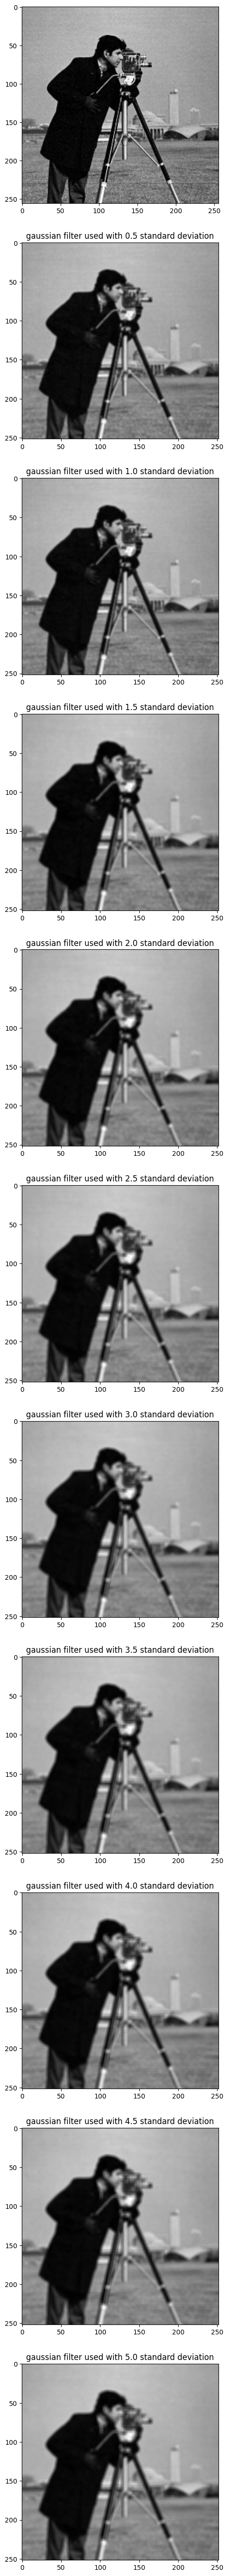

In [214]:
m = 5//2
n = 5//2
gaussian_filter = np.zeros((5, 5), np.uint8) #size of the gaussian filter is 5x5

figure, axs = plt.subplots(11, 1, figsize=(10, 70))

for l in range(1,11,1):
    k = l/2
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(k**2)
            x2 = np.exp(-(x**2 + y**2)/(2* k**2))
            gaussian_filter[x+m, y+n] = int((x2*100000)/x1) #computing the gaussian weights


    #gaussian_filter
    c = 0
    for i in range(5):
        for j in range(5):
            c += gaussian_filter[i,j]
            
    gaussian_filter = gaussian_filter/c   #the gaussian filter


    im = plt.imread("cameraman.png")
    im_1 = cv2.normalize(im, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
    im_r = np.shape(im_1)[0]
    im_c = np.shape(im_1)[1]

    noise = np.random.normal(0, 5, size = im_1.shape)
    I_noisy = im_1 + noise  #adding noise to the original image


    def convolution2d(image, kernel):
        m, n = np.shape(kernel)
        if (m == n):
            y, x = np.shape(image)
            y = y - m + 1
            x = x - m + 1
            new_image = np.zeros((y,x))
            for i in range(y):
                for j in range(x):
                    new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
        return new_image
    
    a = convolution2d(I_noisy, gaussian_filter)
    axs[0].imshow(noisy_im,cmap = 'gray')     #original image   
    axs[l].imshow(a, cmap = 'gray')           #filtered image
    axs[l].set_title('gaussian filter used with {} standard deviation'.format(l/2)) 

    
    

### question 3

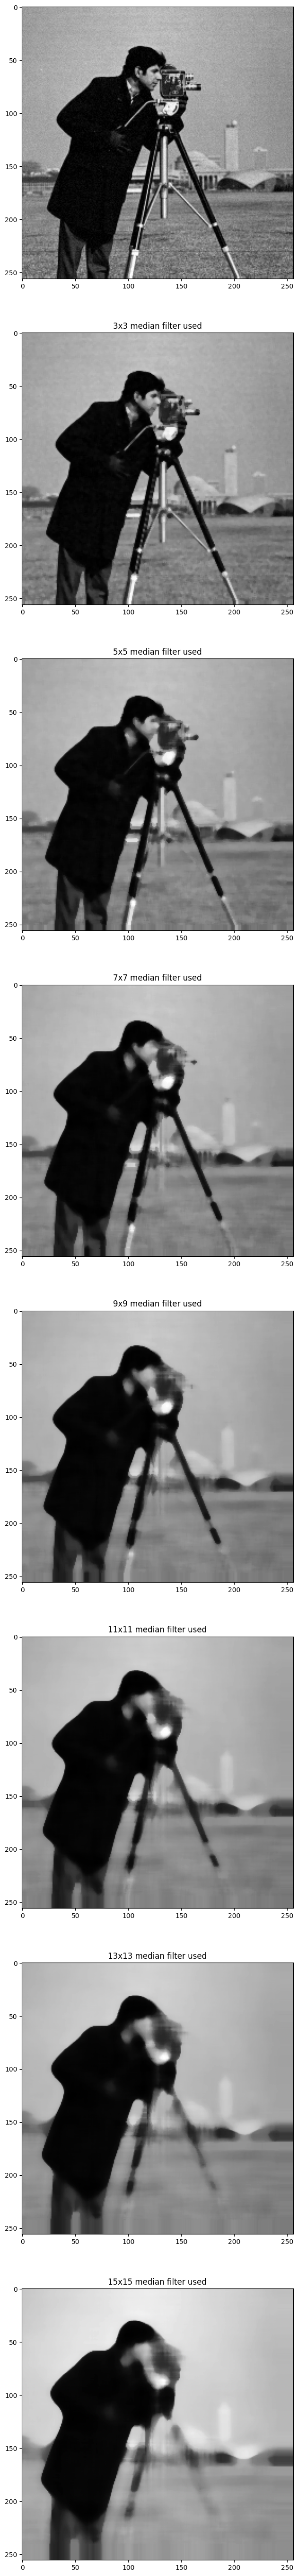

In [215]:
im = plt.imread("cameraman.png")
im_1 = cv2.normalize(im, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
im_r = np.shape(im_1)[0]
im_c = np.shape(im_1)[1]
noise = np.random.normal(0, 5, size = im_1.shape)
I_noisy = im_1 + noise
cv2.imwrite("camera_noise.jpg",I_noisy) 
noisy_im = plt.imread("camera_noise.jpg") #Noisy image

figure, axs = plt.subplots(8, 1, figsize=(10, 70))

for k in range(3,17,2):
    
    out_im = np.zeros((im_r,im_c)).astype(int)
    for i in range(im_r-(k-1)):
        for j in range(im_c-(k-1)):
            median = (list(np.sort(np.ravel(noisy_im[i:i+k,j:j+k])))[int((k**2 - 1)/2)]) #selecting the median
            out_im[i:i+k,j:j+k] = median
    axs[0].imshow(noisy_im,cmap = 'gray')       # original image 
    axs[int((k-1)/2)].imshow(out_im, cmap = 'gray') #filtered image
    axs[int((k-1)/2)].set_title('{}x{} median filter used'.format(k,k)) 
    #plt.imshow(out_im)


### question4

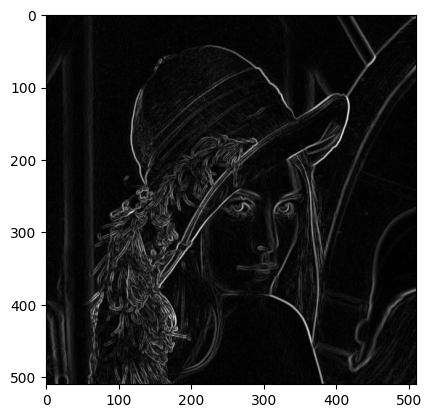

In [189]:
## prewitt -----------------------------------------------------------------------
image_1= plt.imread("lena.jpg") #RGB image
im_r = image_1[:,:,0]
im_g = image_1[:,:,1]
im_b = image_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b #the black and white image


def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

prewitt_1 = [[-1,-1,-1],[0,0,0],[1,1,1]]   # computing the edge for the x-axis
prewitt_2 = [[-1,0,1],[-1,0,1],[-1,0,1]]   # computing the edge for the y-axis

image_x = convolution2d(image, prewitt_1)
image_y = convolution2d(image, prewitt_2)

edge_image = (image_x**2 + image_y**2)**(0.5)  #taking the gradient of both the image_x and image_y 
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:  #correcting the nan values
            edge_image[i,j] = 0
            
            
plt.imshow(edge_image, cmap = 'gray') #edge image


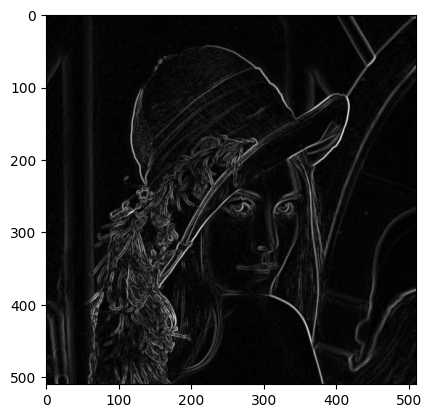

In [190]:
## SOBEL-------------------------------------------------------------------------------------
image_1= plt.imread("lena.jpg") # RGB image
im_r = image_1[:,:,0]
im_g = image_1[:,:,1]
im_b = image_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b #black white image


def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

sobel_1 = [[-1,-2,-1],[0,0,0],[1,2,1]]   #computing the edge for the x-axis
sobel_2 = [[-1,0,1],[-2,0,2],[-1,0,1]]   #computing the edge for the x-axis

image_x = convolution2d(image, sobel_1)
image_y = convolution2d(image, sobel_2)

edge_image = (image_x**2 + image_y**2)**(0.5) #taking the gradient of both the image_x and image_y 
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:  #correcting the nan values
            edge_image[i,j] = 0
            
            
plt.imshow(edge_image, cmap = 'gray')  #edge image

### Question 5


### The L_2 norm was done in the previous question

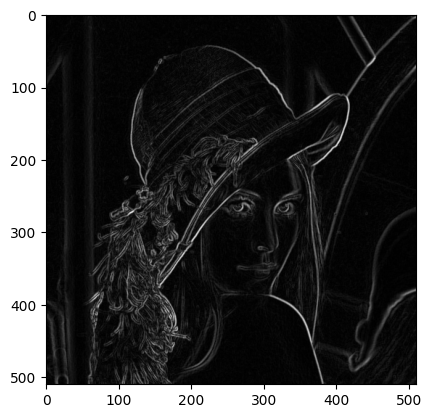

In [191]:
# L1 Norm prewitt----------------------------------------------------------------------

image_1= plt.imread("lena.jpg") # RGB image
im_r = image_1[:,:,0]
im_g = image_1[:,:,1]
im_b = image_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b #black white image


def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

prewitt_1 = [[-1,-1,-1],[0,0,0],[1,1,1]]
prewitt_2 = [[-1,0,1],[-1,0,1],[-1,0,1]]

image_x = convolution2d(image, prewitt_1)
image_y = convolution2d(image, prewitt_2)

edge_image = np.abs(image_x) + np.abs(image_y) #L1 norm
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0
            
            
plt.imshow(edge_image,cmap = 'gray')
#cv2.imwrite("lena_prewitt_L1.jpg",edge_image)

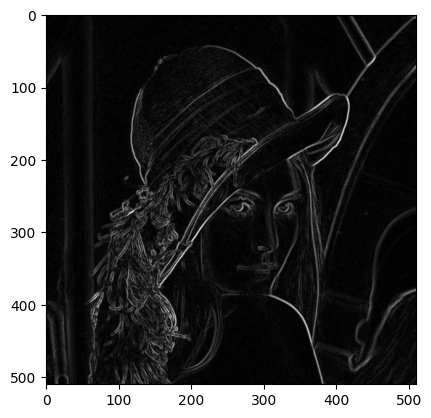

In [195]:
# L1 norm sobel----------------------------------------------------------------------


image_1= plt.imread("lena.jpg") # RGB image
im_r = image_1[:,:,0]
im_g = image_1[:,:,1]
im_b = image_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b  #black white image


def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

sobel_1 = [[-1,-2,-1],[0,0,0],[1,2,1]]
sobel_2 = [[-1,0,1],[-2,0,2],[-1,0,1]]

image_x = convolution2d(image, sobel_1)
image_y = convolution2d(image, sobel_2)

edge_image = np.abs(image_x) + np.abs(image_y) #L1 norm
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0
            
            
plt.imshow(edge_image,cmap = 'gray')

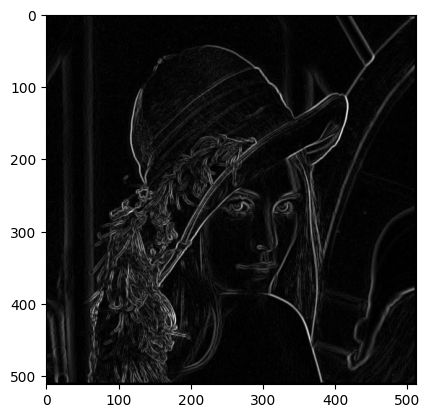

In [186]:
# L_inf norm prewitt------------------------------------------------------------------

image_1= plt.imread("lena.jpg") # RGB image
im_r = image_1[:,:,0]
im_g = image_1[:,:,1]
im_b = image_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b  #black white image


def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

prewitt_1 = [[-1,-1,-1],[0,0,0],[1,1,1]]
prewitt_2 = [[-1,0,1],[-1,0,1],[-1,0,1]]

image_x = convolution2d(image, prewitt_1)
image_y = convolution2d(image, prewitt_2)

edge_image = np.zeros((np.shape(image)[0],np.shape(image)[1])).astype(int)

for i in range(np.shape(image)[0] - 2):
    for j in range(np.shape(image)[1] - 2):
        edge_image[i,j] = max(np.abs(image_x[i,j]),np.abs(image_y[i,j])) #L_inf norm
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0
            
            
plt.imshow(edge_image, cmap = 'gray')
#cv2.imwrite("lena_prewitt_L_inf.jpg",edge_image)

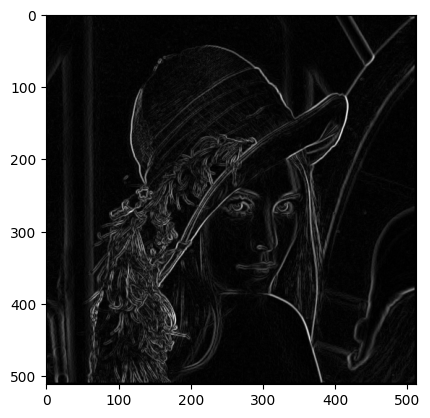

In [193]:
# L_inf norm sobel ---------------------------------------------------------------

image_1= plt.imread("lena.jpg") # RGB image
im_r = image_1[:,:,0]
im_g = image_1[:,:,1]
im_b = image_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b  #black white image


def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

sobel_1 = [[-1,-2,-1],[0,0,0],[1,2,1]]
sobel_2 = [[-1,0,1],[-2,0,2],[-1,0,1]]

image_x = convolution2d(image, sobel_1)
image_y = convolution2d(image, sobel_2)

edge_image = np.zeros((np.shape(image)[0],np.shape(image)[1])).astype(int)

for i in range(np.shape(image)[0] - 2):
    for j in range(np.shape(image)[1] - 2):
        edge_image[i,j] = max(np.abs(image_x[i,j]),np.abs(image_y[i,j])) #L_inf norm
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0
            
            
plt.imshow(edge_image,cmap = 'gray')

### Question 6

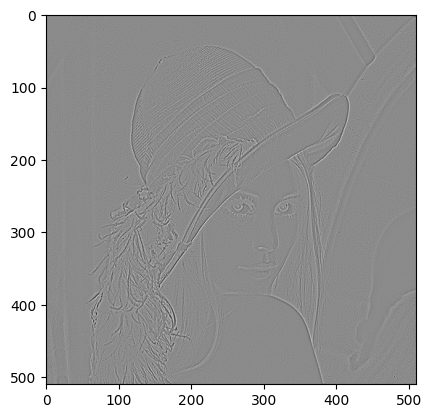

In [239]:
image_1= plt.imread("lena.jpg") #RGB image
im_r = image_1[:,:,0]
im_g = image_1[:,:,1]
im_b = image_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b #B&W image


def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

laplacian = [[0,1,0],[1,-4,1],[0,1,0]] #laplacian kernel

edge_image = convolution2d(image, laplacian)
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0         
plt.imshow(edge_image,cmap = 'gray')

### Question 7

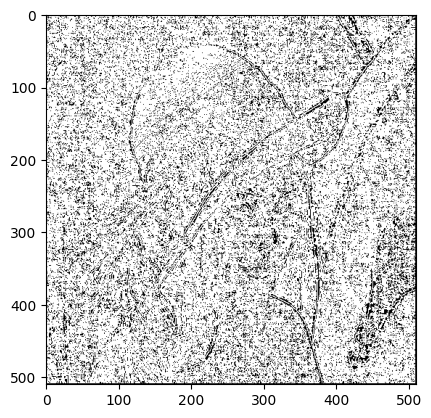

In [62]:
def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

laplacian = [[0,1,0],[1,-4,1],[0,1,0]]
image = plt.imread("lena_BW.jpg")
edge_image = convolution2d(image, laplacian)
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0
            
def handle_img_padding(img1, img2):
    M1, N1 = np.shape(img1)[0], np.shape(img1)[1]
    M2, N2 = np.shape(img2)[0], np.shape(img2)[1]
    padding_x = int(np.abs(M2 - M1)/2)
    padding_y = int(np.abs(N2 - N1)/2)
    img2 = img2[padding_x:M1+padding_x, padding_y: N1+padding_y]
    return img2

def zero_cross_detection(image):
    z_c_image = np.zeros(image.shape).astype(int)

    for i in range(0,image.shape[0]-1):
        for j in range(0,image.shape[1]-1):
            if image[i][j]>0:
                if image[i+1][j] < 0 or image[i+1][j+1] < 0 or image[i][j+1] < 0:
                    z_c_image[i,j] = 1
            elif image[i][j] < 0:
                if image[i+1][j] > 0 or image[i+1][j+1] > 0 or image[i][j+1] > 0:
                    z_c_image[i,j] = 1
    return z_c_image

original_img = plt.imread("lena_BW.jpg")
zero_crossing = zero_cross_detection(edge_image)
zero_crossing = handle_img_padding(original_img, zero_crossing)

plt.imshow(zero_crossing_dog, cmap = 'gray')

### Question 8

In [64]:
im = plt.imread("lighthouse.png")
im_1 = cv2.normalize(im, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U) #converting from png to jpg
cv2.imwrite("lighthouse.jpg",im_1)

lt_im_1 = plt.imread("lighthouse.jpg")

In [65]:
im_r = lt_im_1[:,:,0]
im_g = lt_im_1[:,:,1]
im_b = lt_im_1[:,:,2]
image = 0.2989 * im_r + 0.5870 * im_g + 0.1140 * im_b

cv2.imwrite("lighthouse_bw.jpg",image) #the B&W image with us

True

Text(0.5, 1.0, 'zero crossing image')

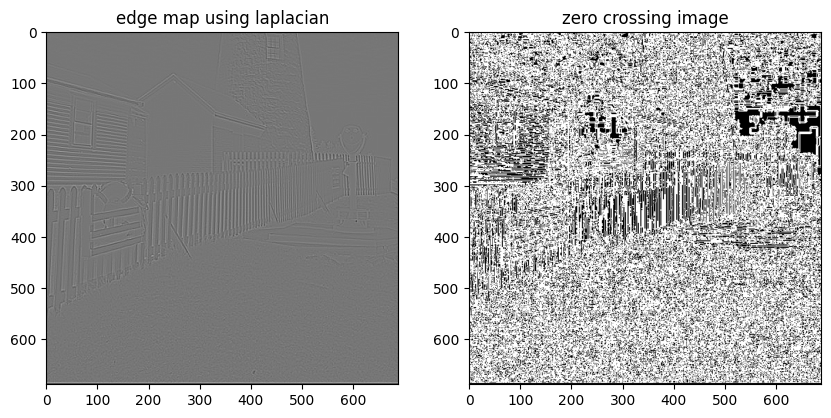

In [66]:
# In this approach first the gaussian filter is applied and then the laplacian and zero crossing
lt_im = plt.imread("lighthouse_bw.jpg")
m = 5//2
n = 5//2
gaussian_filter = np.zeros((5, 5), np.uint8)

for x in range(-m, m+1):
    for y in range(-n, n+1):
        x1 = 2*np.pi*(0.5**2)
        x2 = np.exp(-(x**2 + y**2)/(2* 0.5**2))
        gaussian_filter[x+m, y+n] = int((x2*100000)/x1)


#gaussian_filter
c = 0
for i in range(5):
    for j in range(5):
        c += gaussian_filter[i,j]

gaussian_filter = gaussian_filter/c

def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

laplacian = [[0,1,0],[1,-4,1],[0,1,0]]

edge_image = convolution2d(image, laplacian)
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0


def handle_img_padding(img1, img2):
    M1, N1 = np.shape(img1)[0], np.shape(img1)[1]
    M2, N2 = np.shape(img2)[0], np.shape(img2)[1]
    padding_x = int(np.abs(M2 - M1)/2)
    padding_y = int(np.abs(N2 - N1)/2)
    img2 = img2[padding_x:M1+padding_x, padding_y: N1+padding_y]
    return img2

#function fo rzero crossing
def zero_cross_detection(image):
    z_c_image = np.zeros(image.shape).astype(int)

    for i in range(0,image.shape[0]-1):
        for j in range(0,image.shape[1]-1):
            if image[i][j]>0:
                if image[i+1][j] < 0 or image[i+1][j+1] < 0 or image[i][j+1] < 0:
                    z_c_image[i,j] = 1
            elif image[i][j] < 0:
                if image[i+1][j] > 0 or image[i+1][j+1] > 0 or image[i][j+1] > 0:
                    z_c_image[i,j] = 1
    return z_c_image

original_img = plt.imread("lighthouse_bw.jpg")
zero_crossing = zero_cross_detection(edge_image)
zero_crossing = handle_img_padding(original_img, zero_crossing)



fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(edge_image, cmap = 'gray')
ax[0].set_title("edge map using laplacian")
ax[1].imshow(zero_crossing, cmap = 'gray')
ax[1].set_title("zero crossing image")

### Another variant of question 8

Text(0.5, 1.0, 'zero crossing image')

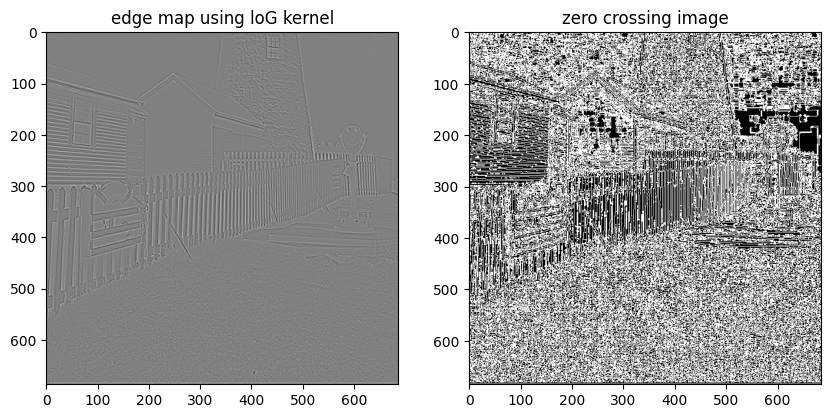

In [68]:
#In the alternative a laplacian of gaussian kernel is formed and then it is convolved with the image
LoG_kernel = np.array([
                        [0, 0,  1, 0, 0],
                        [0, 1,  2, 1, 0],
                        [1, 2,-16, 2, 1],
                        [0, 1,  2, 1, 0],
                        [0, 0,  1, 0, 0]
                    ])

def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    if (m == n):
        y, x = np.shape(image)
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image


edge_image = convolution2d(image, LoG_kernel)
for i in range(np.shape(edge_image)[0]):
    for j in range(np.shape(edge_image)[1]):
        if np.isnan(edge_image[i,j]) == True:
            edge_image[i,j] = 0
#plt.imshow(edge_image, cmap = 'gray')

def handle_img_padding(img1, img2):
    M1, N1 = np.shape(img1)[0], np.shape(img1)[1]
    M2, N2 = np.shape(img2)[0], np.shape(img2)[1]
    padding_x = int(np.abs(M2 - M1)/2)
    padding_y = int(np.abs(N2 - N1)/2)
    img2 = img2[padding_x:M1+padding_x, padding_y: N1+padding_y]
    return img2

def zero_cross_detection(image):
    z_c_image = np.zeros(image.shape).astype(int)

    for i in range(0,image.shape[0]-1):
        for j in range(0,image.shape[1]-1):
            if image[i][j]>0:
                if image[i+1][j] < 0 or image[i+1][j+1] < 0 or image[i][j+1] < 0:
                    z_c_image[i,j] = 1
            elif image[i][j] < 0:
                if image[i+1][j] > 0 or image[i+1][j+1] > 0 or image[i][j+1] > 0:
                    z_c_image[i,j] = 1
    return z_c_image

original_img = plt.imread("lighthouse_bw.jpg")
zero_crossing = zero_cross_detection(edge_image)
zero_crossing = handle_img_padding(original_img, zero_crossing)

#plt.imshow(zero_crossing_dog, cmap = 'gray')

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(edge_image, cmap = 'gray')
ax[0].set_title("edge map using loG kernel")
ax[1].imshow(zero_crossing, cmap = 'gray')
ax[1].set_title("zero crossing image")

# Problem 3

### Question 1

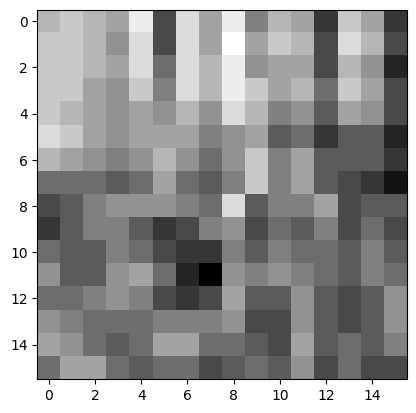

In [173]:
#In the  problem 3 a part (16x16) of the Lena image is chosen (the top left 16x16 pixels)

image = plt.imread("lena_BW.jpg")
crop_img = np.zeros((16,16)).astype(int)
for i in range(np.shape(crop_img)[0]):
    for j in range(np.shape(crop_img)[1]):
        crop_img[i,j] = image[i,j]
        
plt.imshow(crop_img,cmap = 'gray')

In [142]:
#DFT function the hard way
def DFT2D(image):
    #image = plt.imread(image)
    M,N = np.shape(image)[0],np.shape(image)[1]
    dft2d = np.zeros((M,N)).astype(complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 2j * np.pi * (float(k * m) / M + float(l * n) / N))
                    sum_matrix +=  image[m,n] * e
            dft2d[k,l] = sum_matrix
    
    return dft2d

In [156]:
result = DFT2D(zero_mat)
result_abs =np.fft.fftshift(np.abs(result)) # the absolute value (magnitude) plot of DFT (here it is fft shifted)
result_angle = np.angle(result) #the angle plot of DFT

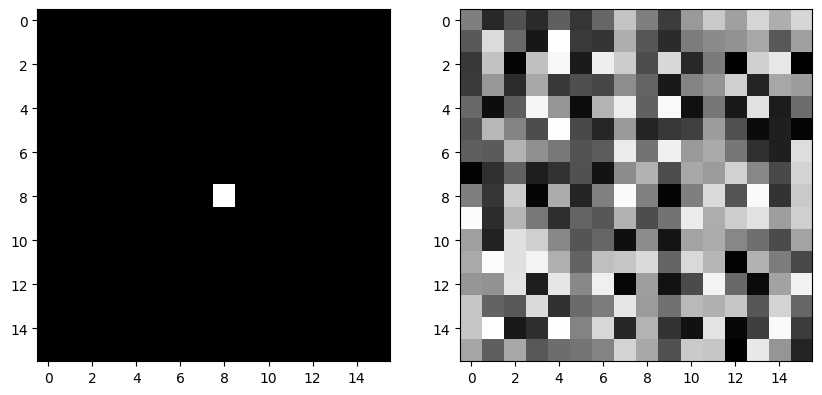

In [157]:
figure, axs = plt.subplots(1, 2, figsize=(10, 10))
    
axs[0].imshow(result_abs, cmap = 'gray')
axs[1].imshow(result_angle, cmap = 'gray')

### Question 2

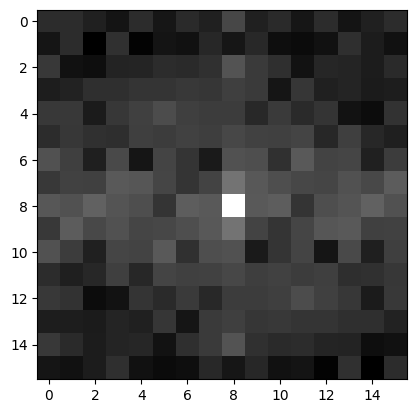

In [162]:
# the log transfomed magnitude plot
log_mat = np.zeros((np.shape(result_abs)[0],np.shape(result_abs)[1]))

for i in range(np.shape(result_abs)[0]):
    for j in range(np.shape(result_abs)[1]):
        log_mat[i,j] = np.log(1 + result_abs[i,j])

plt.imshow(log_mat,cmap = 'gray')

### Question 3

In [163]:
#IDFT function the hard way
def IDFT2D(mat):
    #image = plt.imread(image)
    M,N = np.shape(mat)[0],np.shape(mat)[1]
    idft2d = np.zeros((M,N)).astype(complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = (1/(M*N))*(cmath.exp( 2j * np.pi * (float(k * m) / M + float(l * n) / N)))
                    sum_matrix +=  mat[m,n] * e
            idft2d[k,l] = sum_matrix
    #return plt.imshow(abs(dft2d), cmap = 'gray'),dft2d
    return idft2d

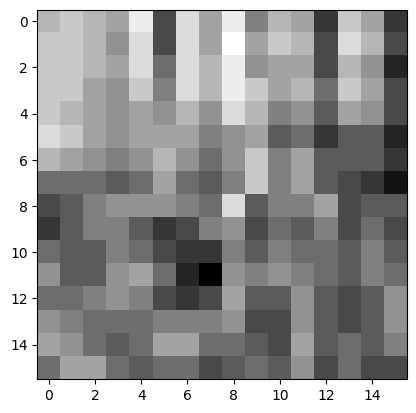

In [175]:
#IDFT of the DFT of the image gives back the same image
A = IDFT2D(result)
A_1 = A.real.round().astype(int)
plt.imshow(A_1,cmap = 'gray')

### Question 4

Text(0.5, 1.0, 'Transposed phase')

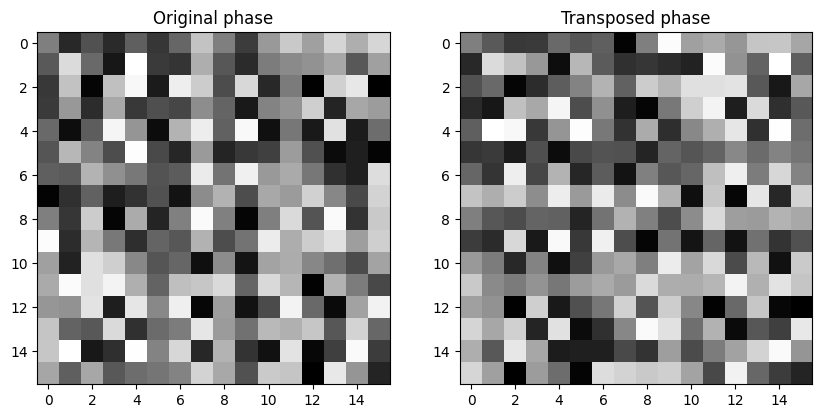

In [185]:
result = DFT2D(zero_mat)
result_abs =np.fft.fftshift(np.abs(result))
result_angle = np.angle(result)

figure, ax = plt.subplots(1,2, figsize = (10,10))
transpose_angle = np.transpose(result_angle)  # Transposing the phase 
ax[0].imshow(result_angle, cmap = 'gray')
ax[0].set_title("Original phase")
ax[1].imshow(transpose_angle, cmap = 'gray')
ax[1].set_title("Transposed phase")

Text(0.5, 1.0, 'Original Image')

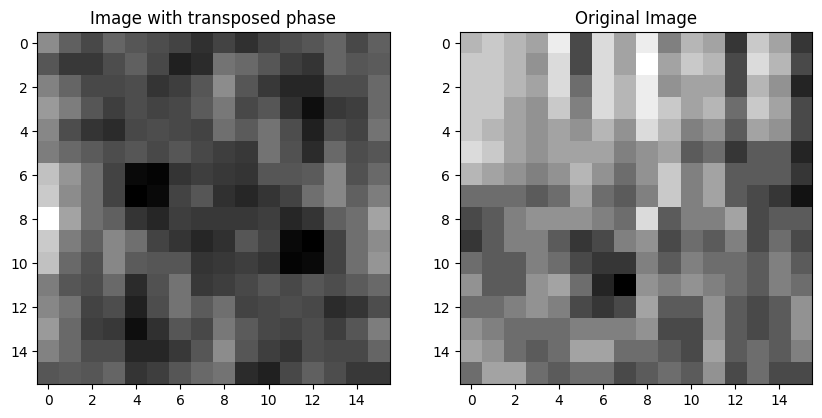

In [198]:
result_abs_1 = np.abs(result)

transpose_image = np.zeros((np.shape(result)[0],np.shape(result)[1]))
for i in range(np.shape(result)[0]):
    for j in range(np.shape(result)[1]):
        transpose_image[i,j] = (result_abs_1[i,j]*(np.cos(transpose_angle[i,j])) + j*(result_abs_1[i,j]*(np.sin(transpose_angle[i,j]))))

        
tr_img_1 = IDFT2D(transpose_image)
tr_img = tr_img_1.real.round().astype(int) #image with the transposed phase
    

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(tr_img, cmap = 'gray')
ax[0].set_title("Image with transposed phase")
ax[1].imshow(A_1,cmap = 'gray')
ax[1].set_title("Original Image")

Text(0.5, 1.0, 'Original Image')

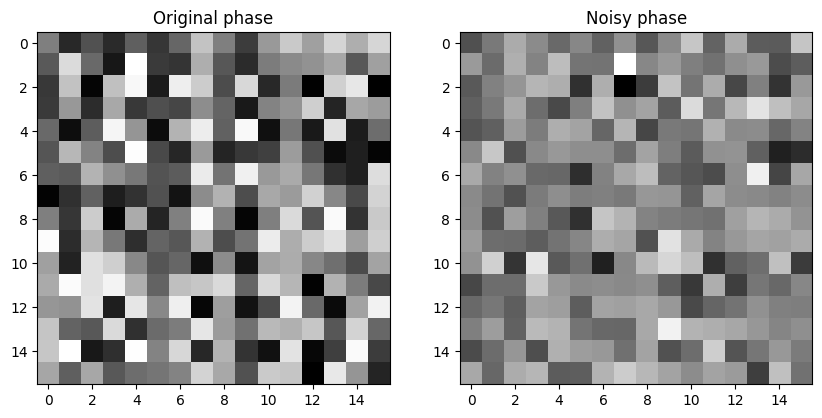

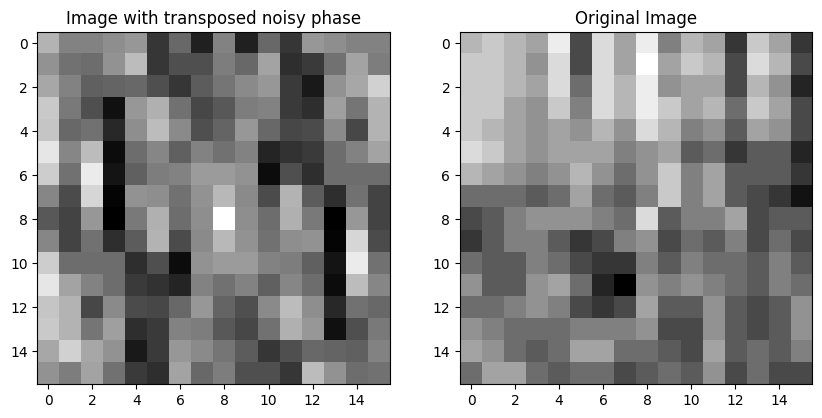

In [200]:
#Transposed noisy phase image generated
noise = np.random.normal(0, 10 , size = result.shape)
result_angle_noisy = result_angle + noise
#plt.imshow(result_angle_noisy, cmap = 'gray')


fig, ax = plt.subplots(1,2, figsize = (10,10))


ax[0].imshow(result_angle, cmap = 'gray')
ax[0].set_title("Original phase")
ax[1].imshow(result_angle_noisy,cmap = 'gray')
ax[1].set_title("Noisy phase")

transpose_image_noisy = np.zeros((np.shape(result)[0],np.shape(result)[1]))
for i in range(np.shape(result)[0]):
    for j in range(np.shape(result)[1]):
        transpose_image_noisy[i,j] = (result_abs_1[i,j]*(np.cos(result_angle_noisy[i,j])) + j*(result_abs_1[i,j]*(np.sin(result_angle_noisy[i,j]))))

        
tr_img_noisy_1 = IDFT2D(transpose_image_noisy)
tr_img_noisy = tr_img_noisy_1.real.round().astype(int)
    

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(tr_img_noisy, cmap = 'gray')
ax[0].set_title("Image with transposed noisy phase")
ax[1].imshow(A_1,cmap = 'gray')
ax[1].set_title("Original Image")

Text(0.5, 1.0, 'Original Image')

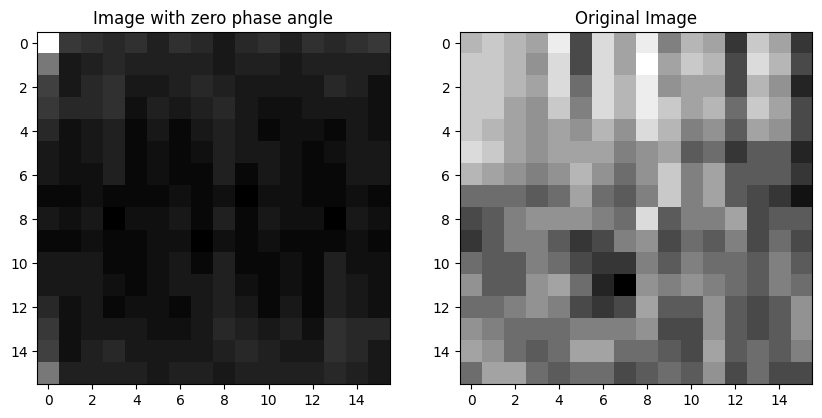

In [202]:
# zero phase image 
# the magnitude spectrum is taken of the original image and a zero phase angle is added to obtain the zero phase image
zero_phase_image = np.zeros((np.shape(result)[0],np.shape(result)[1]))
for i in range(np.shape(result)[0]):
    for j in range(np.shape(result)[1]):
        zero_phase_image[i,j] = (result_abs_1[i,j]*(np.cos(zero_phase_image[i,j])) + j*(result_abs_1[i,j]*(np.sin(zero_phase_image[i,j]))))

        
zero_img_1 = IDFT2D(zero_phase_image)
zero_img = zero_img_1.real.round().astype(int)
    

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(zero_img, cmap = 'gray')
ax[0].set_title("Image with zero phase angle")
ax[1].imshow(A_1,cmap = 'gray')
ax[1].set_title("Original Image")